# Python입문 2_01
## 기초통계량

### Pandas

In [26]:
# 패키지를 import
import pandas as pd

#### pandas.Series

In [27]:
# indexr가['a', 'b', 'c', 'd'], value가[1, 3, 5, 7]인 Series를 생성
s = pd.Series([1, 3, 5, 7], index=['a', 'b', 'c', 'd'])

In [28]:
type(s)

pandas.core.series.Series

In [29]:
s.index

Index(['a', 'b', 'c', 'd'], dtype='object')

In [30]:
s.values

array([1, 3, 5, 7], dtype=int64)

In [31]:
type(s.values)

numpy.ndarray

In [32]:
# 지정된 index의 원소를 추출
s['c']

5

In [33]:
s[2]

5

#### pandas.DataFrame

In [34]:
# 딕셔너리 타입의 데이터를 준비
data = {'shain': ['A', 'B', 'C', 'D', 'E'], 
        'income': [350, 550, 400, 420, 450], 
        'age': [36, 28, 39, 34, 31]}

In [35]:
# 데이터프레임 생성
df = pd.DataFrame(data)

In [36]:
df

,shain,income,age
0,A,350,36
1,B,550,28
2,C,400,39
3,D,420,34
4,E,450,31


In [37]:
type(df)

pandas.core.frame.DataFrame

In [38]:
# age열을 추출
df['age']

0    36
1    28
2    39
3    34
4    31
Name: age, dtype: int64

In [39]:
type(df['age'])

pandas.core.series.Series

In [40]:
# age엻을 추출
df.age

0    36
1    28
2    39
3    34
4    31
Name: age, dtype: int64

In [41]:
type(df.age)

pandas.core.series.Series

In [42]:
# age열을 추출
df[['age']]

,age
0,36
1,28
2,39
3,34
4,31


In [43]:
type(df[['age']])

pandas.core.frame.DataFrame

### Dataframe 불러오기

In [44]:
# 현재의 워킹 디렉토리(wd)를 확인
# import os
# os.getcwd()

In [45]:
# 현재의 wd 내의 파일을 확인
# os.listdir('./')

### 디렉토리 변경

In [46]:
# wd를 변경
# path = '...'  # 예　/usr/tmpdir/
# os.chdir(path)

### 데이터 불러오기
csv형식: 콤마(,)로 구분된 파일형식

In [48]:
# csv파일 불러오기
A = pd.read_csv('./data/company_A.csv')

### 데이터 확인

In [49]:
# 표시 (큰 데이터의 경우는 일부가 생략됨)
A

,shain,income,age
0,A,350,36
1,B,550,28
2,C,400,39
3,D,420,34
4,E,450,31
5,F,420,29
6,G,400,38
7,H,320,34
8,I,320,34
9,J,400,27


In [50]:
# 첫 5행만 출력
A.head()

,shain,income,age
0,A,350,36
1,B,550,28
2,C,400,39
3,D,420,34
4,E,450,31


In [51]:
# 마지막 5행만 출력
A.tail()

,shain,income,age
5,F,420,29
6,G,400,38
7,H,320,34
8,I,320,34
9,J,400,27


In [59]:
# A의 'income'열을 추출
display(A['income'])
display(A.income)
display(A[['income']])

0    350
1    550
2    400
3    420
4    450
5    420
6    400
7    320
8    320
9    400
Name: income, dtype: int64

0    350
1    550
2    400
3    420
4    450
5    420
6    400
7    320
8    320
9    400
Name: income, dtype: int64

,income
0,350
1,550
2,400
3,420
4,450
5,420
6,400
7,320
8,320
9,400


In [58]:
A['income'] == A.income

0    True
1    True
2    True
3    True
4    True
5    True
6    True
7    True
8    True
9    True
Name: income, dtype: bool

- 실제로는A['income'], A.income와 A[['income']]는「타입」이 다르다

In [60]:
# df A의 income열을 변수 a에 대입
a = A['income']

In [61]:
a

0    350
1    550
2    400
3    420
4    450
5    420
6    400
7    320
8    320
9    400
Name: income, dtype: int64

In [62]:
# 히스토그램 표시
# Jupyter Notebook상에서 그래프를 표시하기 위한 커맨드
%matplotlib inline

<AxesSubplot:>

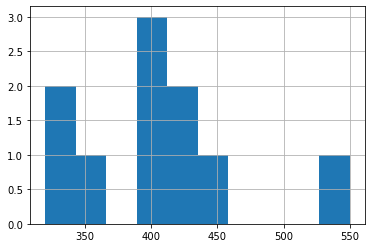

In [63]:
a.hist()

### 참고: Dataframe의 조작 예시

In [64]:
A

,shain,income,age
0,A,350,36
1,B,550,28
2,C,400,39
3,D,420,34
4,E,450,31
5,F,420,29
6,G,400,38
7,H,320,34
8,I,320,34
9,J,400,27


In [65]:
A2 = A[['income', 'age']]
A2.head()

,income,age
0,350,36
1,550,28
2,400,39
3,420,34
4,450,31


In [66]:
# age가 35보다 큰 행만 추출
A2.loc[A2.age > 35]

,income,age
0,350,36
2,400,39
6,400,38


In [67]:
# 열별로 최대값을 표시
A2.max()

income    550
age        39
dtype: int64

In [68]:
# 열별로 최소값을 표시
A2.min()

income    320
age        27
dtype: int64

In [69]:
# 데이터프레임의 열 별로 함수를 적용
A2.apply(lambda x: x.max() - x.min())

income    230
age        12
dtype: int64

### 참고: help

In [70]:
# 앞에서 작성한 A2에 대한 help를 표시
help(A2)

Help on DataFrame in module pandas.core.frame object:

class DataFrame(pandas.core.generic.NDFrame)
 |  DataFrame(data=None, index: Union[Collection, NoneType] = None, columns: Union[Collection, NoneType] = None, dtype: Union[ForwardRef('ExtensionDtype'), str, numpy.dtype, Type[Union[str, float, int, complex, bool]], NoneType] = None, copy: bool = False)
 |  
 |  Two-dimensional, size-mutable, potentially heterogeneous tabular data.
 |  
 |  Data structure also contains labeled axes (rows and columns).
 |  Arithmetic operations align on both row and column labels. Can be
 |  thought of as a dict-like container for Series objects. The primary
 |  pandas data structure.
 |  
 |  Parameters
 |  ----------
 |  data : ndarray (structured or homogeneous), Iterable, dict, or DataFrame
 |      Dict can contain Series, arrays, constants, or list-like objects.
 |  
 |      .. versionchanged:: 0.23.0
 |         If data is a dict, column order follows insertion-order for
 |         Python 3.6 and 

In [71]:
A2?

Type:        DataFrame
String form:
   income  age
0     350   36
1     550   28
2     400   39
3     420   34
4     450   31
5     420   29
6     400   38
7     320   34
8     320   34
9     400   27
Length:      10
File:        c:\users\playdata\anaconda3\lib\site-packages\pandas\core\frame.py
Docstring:  
Two-dimensional, size-mutable, potentially heterogeneous tabular data.

Data structure also contains labeled axes (rows and columns).
Arithmetic operations align on both row and column labels. Can be
thought of as a dict-like container for Series objects. The primary
pandas data structure.

Parameters
----------
data : ndarray (structured or homogeneous), Iterable, dict, or DataFrame
    Dict can contain Series, arrays, constants, or list-like objects.

    .. versionchanged:: 0.23.0
       If data is a dict, column order follows insertion-order for
       Python 3.6 and later.

    .. versionchanged:: 0.25.0
       If data is a list of dicts, column order follows insertion-order
 

In [72]:
A2??

Type:        DataFrame
String form:
   income  age
0     350   36
1     550   28
2     400   39
3     420   34
4     450   31
5     420   29
6     400   38
7     320   34
8     320   34
9     400   27
Length:      10
File:        c:\users\playdata\anaconda3\lib\site-packages\pandas\core\frame.py
Source:     
class DataFrame(NDFrame):
    """
    Two-dimensional, size-mutable, potentially heterogeneous tabular data.

    Data structure also contains labeled axes (rows and columns).
    Arithmetic operations align on both row and column labels. Can be
    thought of as a dict-like container for Series objects. The primary
    pandas data structure.

    Parameters
    ----------
    data : ndarray (structured or homogeneous), Iterable, dict, or DataFrame
        Dict can contain Series, arrays, constants, or list-like objects.

        .. versionchanged:: 0.23.0
           If data is a dict, column order follows insertion-order for
           Python 3.6 and later.

        .. versionchan

### 기초통계량을 구하자

In [73]:
# math 패키지를 import
import math

In [74]:
a

0    350
1    550
2    400
3    420
4    450
5    420
6    400
7    320
8    320
9    400
Name: income, dtype: int64

#### 샘플 사이즈

In [75]:
a.count()

10

#### 평균

In [59]:
a.mean()

403.0

#### 중앙값

In [76]:
a.median()

400.0

#### 최빈값

In [77]:
a.mode()

0    400
dtype: int64

#### 최소 최대값

In [78]:
a.min()

320

In [79]:
a.max()

550

#### 분산

https://velog.io/@2innnnn0/%ED%86%B5%EA%B3%84%ED%95%99%EB%8F%84%EA%B0%903-%EC%B6%94%EC%B8%A1%ED%86%B5%EA%B3%84%ED%95%99

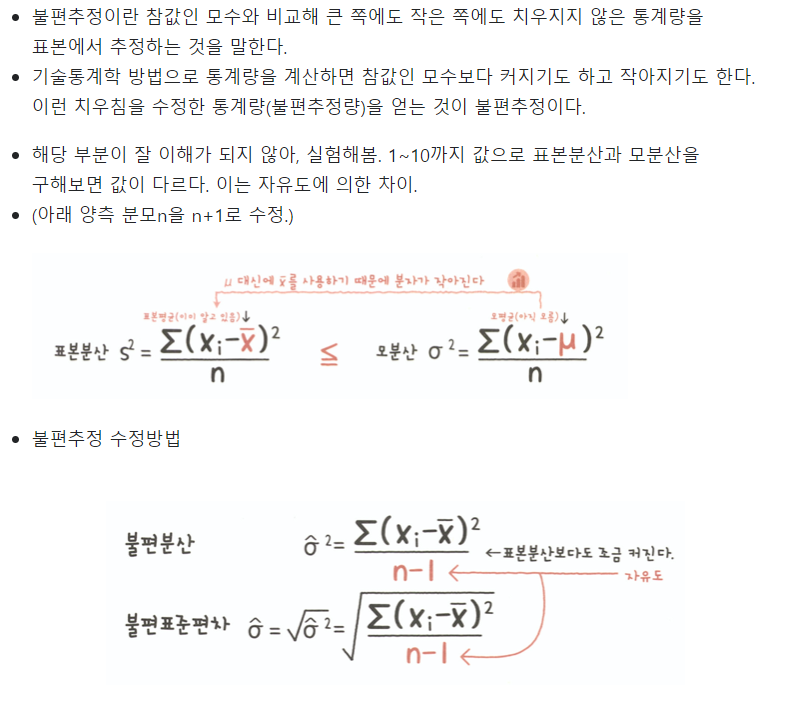

In [88]:
from IPython.display import Image
Image(filename='sigma.png') 

In [80]:
# 분산(불편)
a.var()

4556.666666666667

In [81]:
# 분산(불편)
a2 = (a - a.mean())**2
a2.sum() / (a2.count() - 1)

4556.666666666667

In [83]:
# 분산
a.var(ddof=0) 

4101.0

In [84]:
# 분산
a2.sum() / a2.count()

4101.0

#### 표준편차

In [68]:
# 표준편차(불편)
a.std()

67.50308634919345

In [89]:
# 표준편차(불편)
math.sqrt(a2.sum() / (a2.count() - 1))

67.50308634919345

In [91]:
# 표준편차
a.std(ddof=0)

64.03905058634146

In [92]:
# 표준편차
math.sqrt(a2.sum() / a2.count())

64.03905058634146

#### 요약통계량

In [94]:
a.describe()

count     10.000000
mean     403.000000
std       67.503086
min      320.000000
25%      362.500000
50%      400.000000
75%      420.000000
max      550.000000
Name: income, dtype: float64

#### 비대칭도 (왜도; 歪度)

In [95]:
a.skew()

0.9020151655425462

#### 첨도 (尖度)
뾰족한 정도

In [96]:
a.kurt()

1.7027965289339972